In [1]:
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cbs_df = pd.read_csv('cbs_dataset.csv')
happy_netherlands = pd.read_csv('happiness_2016_2022_US_NL.csv')

# Smiles and lines: Happiness in relation to drug use
#### By Sue Zheng, Mike Reiziger, Thomas Elsinga en Naud Sluis

### Introduction
Analysing databases allows us to gain in-depth and clear insights about different aspects of society. In this study, we will focus on the relationship between happiness and drug use in the countries of the Netherlands and the United States of America; two countries that seem to show opposite trends. By comparing data from these countries, we can gain a better understanding of how drug use and happiness are linked and explain possible differences.

After all, the Netherlands is internationally known for its liberal drug policies, especially regarding cannabis. (Babor et al. 2010) This has led to the perspective that drug use and happiness seem to be closely linked in the Netherlands. In the United States of America, another wealthy country in the western world, this relationship between drug use and happiness seems to be less present. Despite strict drug laws, the US still seems to show an upward trend with regard to happiness (Azofeifa et al. 2016). This therefore gives rise to two perspectives, namely that drugs and happiness are linked or that drugs and happiness can be seen separately and have no correlation with each other.

To visualise these perspectives, different datasets were chosen. A dataset related to the drug usage per year for the Netherlands 'leefstijl; persoonskenmerken' and one for the USA Illicit drug use. The third dataset shows happiness per year (World Happiness Report). With this dataset, we visualise the given perspectives, possibly providing an answer to these different perspectives. Moreover, this project can contribute to a more nuanced understanding of drug use and happiness. It can help to reduce biases and generalisations by showing that the relationship between these two variables may be context-dependent and may not have a mutual relationship after all. This may have a positive impact on the stigma surrounding drug use and thereby make drug use perceived as less negative.

### Perspective one: Happiness and drug use are linked

In recent years, you hear it more and more often: drug use in the Netherlands has gone up. RTL Nieuws already reported that on a Sunday in Amsterdam 100 lines of cocaine are snorted per 1,000 inhabitants; so why is it that drug use has risen so much? 

As mentioned earlier, the law in the Netherlands is very progressive when it comes to drugs. Cannabis is tolerated, and having taken prohibited narcotics is not punishable. It would perhaps be obvious to say that the increased use has to do with the legalisation of cannabis and hashish, however, this law came into force in 1976. To see results of this only now is not very plausible. 

However, the Netherlands has become happier in recent years; for instance, the Netherlands went from place 6 to 5 in the World Happiness Report (WHR). So a link to drug use could indeed be drawn here. This can also be seen, for instance, in the increased freedom in the Netherlands; the right to make your own life choices. You can also see that especially the most affluent native Dutch have increased in drug use.

### Argument 1


Since 2016, the number of highly educated people in the Netherlands has increased by 10% (Hoogst Behaald Onderwijsniveau, 2023). A higher education is linked to greater happiness in 2019 by Ruiu, G., by monetary aspects, among others, but also by a greater chance of getting a job, interpersonal networking and a higher degree of cosmopolitanism. Since 2016, drug use has also increased among the highly educated. This points to a correlation of 0.6 between happiness score and drug use among the highly educated. Or in other words more (of themselves happy) high educated people have started using more drugs.

In [4]:

# high_df = cbs_df.loc[cbs_df['\ufeff"Persoonskenmerken"'] == 'Leeftijd: 18 jaar of ouder']
# high_df
neth_df = happy_netherlands.loc[happy_netherlands['Country'] == 'Netherlands']

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.array(neth_df['Year']),
    y=np.array(neth_df['Happiness Score']),
    name='happiness score in The Netherlands'
))

fig.add_trace(go.Scatter(
    x=np.array(happy_netherlands['Year']),
    # 'Kenmerken' veranderen voor '\ufeff"Persoonskenmerken"', dan werkt ie weer.
    y=np.array(cbs_df.loc[cbs_df['\ufeff"Persoonskenmerken"'] == 'Hoog onderwijsniveau']['Drugsgebruik, 12 jaar of ouder/Drugsgebruik totaal/Afgelopen jaar (%)']),
    name='18 years or older and highly educated drug usage in the past year in the Netherlands',
    yaxis='y2'
))

fig.update_layout(
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01),

    yaxis=dict(
        title='Happiness Score',
        tickformat=".1f",
        categoryorder='array',
        categoryarray= ['7.339', '7.377', '7.415', '7.441', '7.449', '7.464', '7.488']
    ),
    yaxis2=dict(
        title='Drugs Usage (%)',
        overlaying='y',
        side='right',
        categoryorder='category ascending'
    ), 
    title = "Happiness score and drug usage in the Netherlands"
)

fig.show()


Figure 1: Happiness score and drug usage in the Netherlands in the years 2016 to 2022

Argument 1: The number of highly educated has increased, as has drug use among the highly educated. Also, the highly educated are happier than other education levels. 

### Argument 2

The relationship to be discovered below is about drug use in a country where the use of soft drugs is decriminalised, namely the Netherlands. In this country, we see that drug use among minors is very low compared to the United States. Among adults, on the contrary, we see that drug use has increased enormously, for this target group it is much easier to obtain drugs and it is therefore a lot more accessible to use drugs. In the United States, where drugs are illegal in almost all states, this trend is almost not visible. In the US, drug use among minors is already significantly high and does not significantly increase or decrease after adulthood. Based on this data, it can be argued that better regulation of (soft) drugs causes minors to wait to use drugs and it can be argued that this can contribute to a healthier youth.

In [6]:
# Read the CSV file
df_ned = pd.read_csv('cbs_dataset.csv')
df_usa = pd.read_csv('pre_usa.csv')

df_ned_16_20 = df_ned [df_ned ['\ufeff"Persoonskenmerken"'] == 'Leeftijd: 12 tot 16 jaar']
df_ned_20_30 = df_ned [df_ned ['\ufeff"Persoonskenmerken"'] == 'Leeftijd: 20 tot 30 jaar']


# Create bars, colour and title
fig = go.Figure(data=[
    go.Bar(name='Drug usage USA: 16 tot 17', x=df_usa['Year'], y=df_usa['16 to 17 years'], marker=dict(color='rgb(141,160,203)')),
    go.Bar(name='Drug usage USA: 26 tot 34', x=df_usa['Year'], y=df_usa['26 to 34 years'], marker=dict(color='rgb(181,25,99)')),
    go.Bar(name='Drug usage the Netherlands: 12 till 16', x=df_ned_16_20['Perioden'], y=df_ned_16_20['Drugsgebruik, 12 jaar of ouder/Drugsgebruik totaal/Afgelopen jaar (%)'], marker=dict(color='rgb(102,194,165)')),
    go.Bar(name='Drug usage the Netherlands: 20 till 30', x=df_ned_20_30['Perioden'], y=df_ned_20_30['Drugsgebruik, 12 jaar of ouder/Drugsgebruik totaal/Afgelopen jaar (%)'], marker=dict(color='rgb(252,141,98)')),
])

# Graph Design
fig.update_layout(title=dict(text='Drug usage in minors and adults per year in the Netherlands and the USA'), 
    xaxis_type='category', xaxis=dict(title='Year', tickmode='linear'), 
    yaxis=dict(title='drug usage (%)'),
    barmode='group',
    autotypenumbers='convert types')

Figure 3: Drug usage in minors and adults per year in the Netherlands and the USA

### Argument 3

In recent years, the number of households with a capital of a million or more in the Netherlands has increased (CBS, 2022). People in the highest wealth group are generally happier than those in a lower wealth group. Also, the most affluent people in the Netherlands also started using more drugs. This suggests a link between happiness and drug use. This is most evident in the years 2019 and 2020, where the number of millionaire households and drug use rise almost proportionally. In 2021, we see a dip in this group of people, which roughly coincides with the COVID-19 crisis and the societal lockdown that took place as a result.

In [7]:
# Filter on 'kenmerken'
f_df = cbs_df[cbs_df['\ufeff"Persoonskenmerken"'] == 'Vermogen: 4e 20%-groep']
fi_df = cbs_df[cbs_df['\ufeff"Persoonskenmerken"'] == 'Vermogen: 5e 20%-groep']
miljonairs_df = pd.read_csv('miljoen.csv')
 
# Create bars, colour and title
fig = go.Figure(data=[
    go.Bar(name='Total drug use in the highest wealth level', x=fi_df['Perioden'], y=fi_df["Drugsgebruik, 12 jaar of ouder/Drugsgebruik totaal/Afgelopen jaar (%)"], marker=dict(color='rgb(14,140,203)'),
    width=[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]),
    go.Scatter(x=np.array(miljonairs_df['Jaar']),
    y=np.array(miljonairs_df['In lopende prijzen (x 1 000)']),
    name='Households with capital > 1.000.000', yaxis='y2')])

# Graph Design
fig.update_layout(title=dict(text='Drug usage per year per wealth level'), 
    legend=dict(
    yanchor="top",
    y=1.5,
    xanchor="left",
    x=1,
    bordercolor='blue',
    borderwidth = 1),
    
    xaxis_type='category', xaxis=dict(title='Year', tickmode='linear'), 
    yaxis=dict(title='Drug usage (%)', categoryorder='total ascending'),
    yaxis2=dict(
        title='Amount of households x1000',
        overlaying='y',
        side='right',
        categoryorder='category ascending'
    ),
    barmode='group')

Figure 3: Drug usage per year per wealth level, with in blue the drug usage of the highest wealth level in percent. In orange you see the amout of household with a capital of more that a million. 

Argument 3: The amount of household with a capital of more than a million has gone up. Wealthier people are more happy, and as can be seen started using more drugs

### Perspective two: Happiness and drug use are not linked

The United States is a country that went up and down around 6 places over the last 6 years, but the drug use remained steady. That would mean that there is no connection between happiness and drug use.

Over the past six years, the United States has experienced fluctuations in its global happiness ranking among countries. However, despite these ups and downs in rankings, one notable constant has been the steady prevalence of drug use within the country. This observation suggests that there may not be a direct correlation between the level of happiness in a nation and the prevalence of drug use. Like any other country, the United States undergoes various economic, social, and political changes that can influence its overall ranking in terms of happiness and well-being. Factors such as income inequality, access to healthcare, education, social support systems, and political stability all play a role in shaping the nation's overall happiness. Drug use is a complex issue influenced by a multitude of factors, including individual choices, addiction, social environment, and availability of drugs. These factors can persist even as other indicators of well-being fluctuate. Therefore, it is important to consider that happiness and drug use are not necessarily directly linked. 

In summary, despite fluctuations in the United States' ranking over the past six years, the prevalence of drug use has remained steady. This suggests that there may not be a simple and direct connection between national happiness and drug use. 

### Argument 1

The United States has experienced fluctuations in its happiness rankings over the years 2016 to 2022. However, during this same period, the prevalence of drug use has remained relatively stable. This suggests that there is no consistent connection between a country's happiness ranking and the rate of drug use. If there were a direct correlation between happiness and drug use, we would expect to see similar patterns of fluctuation in both indicators. The lack of a consistent relationship between these variables indicates that other factors beyond happiness rankings play a more significant role in determining drug use prevalence.

As u can see in the figure below, the patterns of drug usage in the US and the happiness rankings do not correlate, thus meaning that there is not necessarily a link between happiness and drug usage. 



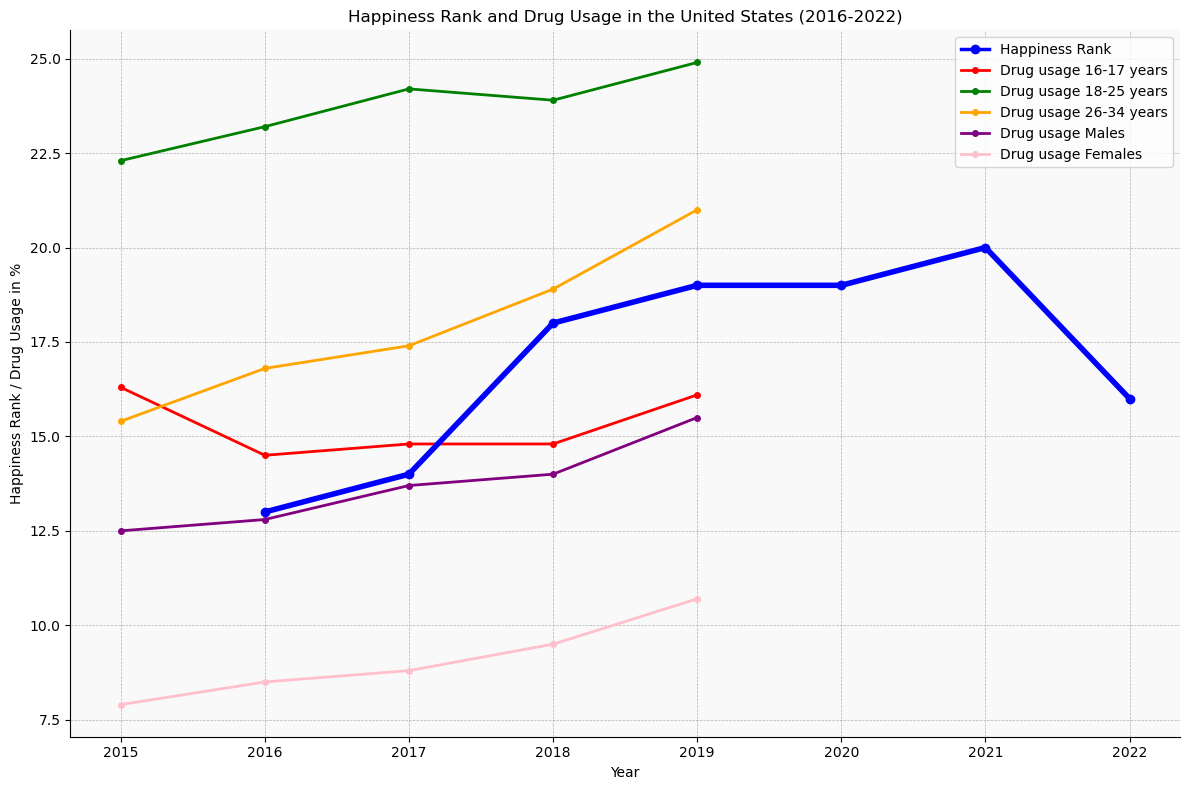

In [79]:
# Read the CSV files
happiness_df = pd.read_csv("happiness_2016_2022_US_NL.csv")
drug_use_df = pd.read_csv("pre_usa.csv")

# Extract data for the United States
usa_happiness = happiness_df[happiness_df["Country"] == "United States"]

# Plot the data
plt.figure(figsize=(12, 8))

# Plot Happiness Ranking with thicker line and markers
plt.plot(usa_happiness["Year"], usa_happiness["Happiness Rank"], marker='o', markersize=6, label="Happiness Rank", color="blue", linewidth=2.5)

# Plot Drug Usage
drug_use_columns = ["16 to 17 years", "18 to 25 years", "26 to 34 years", "Male", "Female"]
drug_use_labels = ["Drug usage 16-17 years", "Drug usage 18-25 years", "Drug usage 26-34 years", "Drug usage Males", "Drug usage Females"]
colors = ["red", "green", "orange", "purple", "pink"]

for i, column in enumerate(drug_use_columns):
    plt.plot(drug_use_df["Year"], drug_use_df[column], marker='o', markersize=4, label=drug_use_labels[i], color=colors[i], linewidth=2)

# Set plot labels and title
plt.xlabel("Year")
plt.ylabel("Happiness Rank / Drug Usage in %")
plt.title("Happiness Rank and Drug Usage in the United States (2016-2022)")
plt.legend(loc="upper right", fontsize=10)

# Customize grid and ticks
plt.grid(True, linestyle='--', linewidth=0.5)

# Set background color and spines visibility
plt.gca().set_facecolor("#F9F9F9")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a legend with a white background
plt.legend(frameon=True, facecolor="white")

# Highlight the happiness rank line by adding a thicker white line behind it
plt.plot(usa_happiness["Year"], usa_happiness["Happiness Rank"], color="blue", linewidth=4)

# Show the plot
plt.tight_layout()
plt.show()

Figure 4: Happiness score and drug usage in the US in the years 2015 to 2022


### Argument 2

By examining variables such as GDP, freedom, healthcare accessibility, and social support systems, we can identify the potential drivers of drug use. If these factors remain relatively stable over the six-year period, it further supports the argument that drug use is influenced by fators other than happiness alone, and that societal factors influence drug use.

Looking at the 2 figures below and comparing them, we can see that the patterns of drug usage, social support and freedom are somewhat similar, meaning that drug usage is indeed influenced by fators other than happiness alone, and that societal factors influence drug use. This can be further confirmed by looking at the Pearson correlation coefficient for example: The Pearson correlation coefficient between Social support and the drug usage from people between 18 to 25 years is 0.797, which means there is a strong correlation.

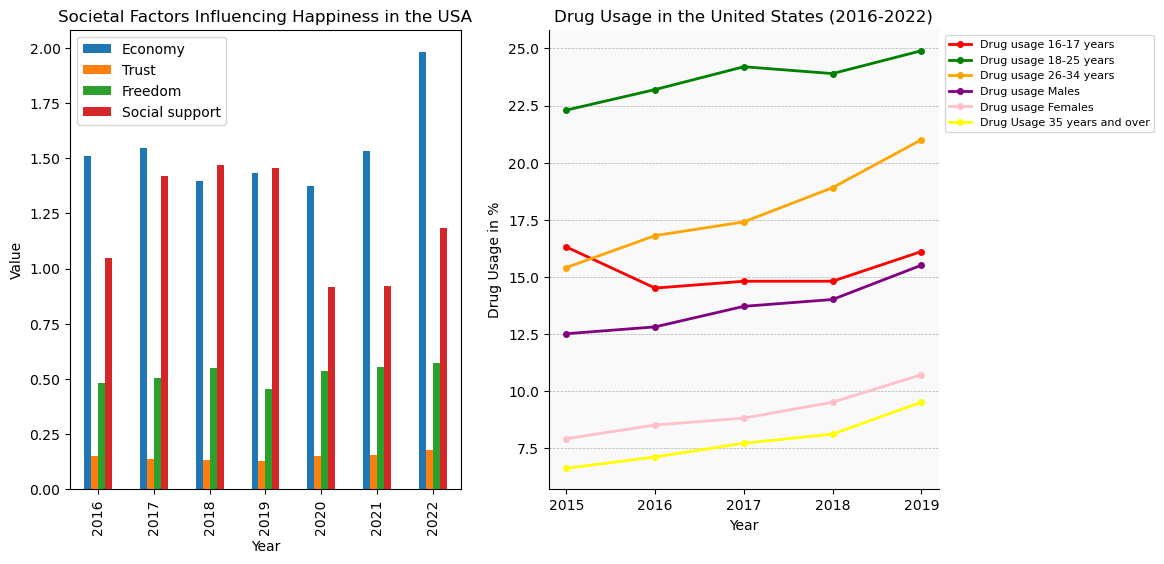

In [80]:
# Read the happiness_2016_2022_US_NL.csv file
happiness_df = pd.read_csv("happiness_2016_2022_US_NL.csv")

# Extract data for the United States
usa_happiness = happiness_df[happiness_df["Country"] == "United States"]

# Extract relevant columns for happiness analysis
columns_of_interest = ["Year", "Economy", "Trust", "Freedom", "Social support"]
df_subset = usa_happiness[columns_of_interest]

# Set the Year column as the index for better visualization
df_subset.set_index("Year", inplace=True)

# Set figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the data for happiness factors as a bar chart
df_subset.plot(kind="bar", ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Value")
axs[0].set_title("Societal Factors Influencing Happiness in the USA")

# Read the pre_usa.csv file
drug_use_df = pd.read_csv("pre_usa.csv")

# Define drug usage columns and labels
drug_use_columns = ["16 to 17 years", "18 to 25 years", "26 to 34 years", "Male", "Female", "35 years and over"]
drug_use_labels = ["Drug usage 16-17 years", "Drug usage 18-25 years", "Drug usage 26-34 years", "Drug usage Males", "Drug usage Females", "Drug Usage 35 years and over"]
colors = ["red", "green", "orange", "purple", "pink", "yellow"]

# Set the line plot for drug usage
for i, column in enumerate(drug_use_columns):
    axs[1].plot(drug_use_df["Year"], drug_use_df[column], marker='o', markersize=4, label=drug_use_labels[i], color=colors[i], linewidth=2)

# Set x-axis labels for drug usage
axs[1].set_xticks(drug_use_df["Year"])

# Set plot labels and title for drug usage
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Drug Usage in %")
axs[1].set_title("Drug Usage in the United States (2016-2022)")

# Move the legend outside the drug usage plot
axs[1].legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=8)

# Customize grid and ticks for drug usage
axs[1].grid(True, linestyle='--', linewidth=0.5, axis='y')

# Set background color and spines visibility for drug usage
axs[1].set_facecolor("#F9F9F9")
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Adjust layout and padding
fig.tight_layout(pad=2)

# Show the plots
plt.show()


Figure 5: Societal factors influencing happiness in the USA

Figure 6: Drug Usage in the United States (2016-2022)


# References
Babor, T. F., Caulkins, J. P., Edwards, G., Fischer, B., Foxcroft, D. R., Humphreys, K., ... & Reuter, P. (2010). Drug policy and the public good.

Azofeifa, A., Mattson, M. E., Schauer, G., McAfee, T., Grant, A., & Lyerla, R. (2016). National estimates of marijuana use and related indicators—National Survey on Drug Use and Health, United States, 2002–2014. Morbidity and Mortality Weekly Report: Surveillance Summaries, 65(11), 1-25.

Ruiu, G., Ruiu, M.L. The Complex Relationship Between Education and Happiness: The Case of Highly Educated Individuals in Italy. J Happiness Stud 20, 2631–2653 (2019). https://doi.org/10.1007/s10902-018-0062-4

Hoogst behaald onderwijsniveau. (2023). Ocwincijfers.nl. https://www.ocwincijfers.nl/sectoren/onderwijs-algemeen/hoogst-behaald-onderwijsniveau#:~:text=Hoogopgeleide%2025%2D%20tot%2035%2Djarigen%20naar%20mannen%20en%20vrouwen,-Line%20chart%20with&text=In%202022%20was%2056%25%20van,2022%20ging%20het%20om%2061%25.
